In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/My Drive/datasets/nn_train.csv'
data=pd.read_csv(file_path)
matrix = data.iloc[:, 1:].values
matrix1=matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
for r in range (1024):
  matrix[:, r]= (matrix[:,r]-np.mean(matrix[:,r]))/(np.std(matrix[:,r]))
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def relu(z):
  return np.maximum(0, z)

def model(X, Y, hidden_units, num_iterations, learning_rate):
  np.random.seed(1)
  n_x = X.shape[0]
  n_y = Y.shape[0]


  W1 = np.random.randn(hidden_units[0], n_x) * 0.01
  b1 = np.zeros((hidden_units[0], 1))
  W2 = np.random.randn(hidden_units[1], hidden_units[0]) * 0.01
  b2 = np.zeros((hidden_units[1], 1))
  W3 = np.random.randn(hidden_units[2], hidden_units[1]) * 0.01
  b3 = np.zeros((hidden_units[2], 1))
  W4 = np.random.randn(n_y, hidden_units[2]) * 0.01
  b4 = np.zeros((n_y, 1))

  for i in range(num_iterations):

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = softmax(Z4)

        # Compute cost (categorical cross-entropy loss)
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A4)) / m
    lambda_reg = 0.01
    cost += (lambda_reg / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)) + np.sum(np.square(W4)))

    dZ4 = A4 - Y
    dW4 = (1 / m) * np.dot(dZ4, A3.T)
    db4 = (1 / m) * np.sum(dZ4, axis=1, keepdims=True)

    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * (Z3 > 0)
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * (Z2 > 0)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)


    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4

    if i % 1000 == 0:
      print(f"Iteration {i}, Cost: {cost:.4f}")

  return {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4}

def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # For numerical stability
  return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def predict(X, parameters):
  W1, b1, W2, b2, W3, b3, W4, b4 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"], parameters["W3"], parameters["b3"], parameters["W4"], parameters["b4"]
  Z1 = np.dot(W1, X) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = relu(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = relu(Z3)
  Z4 = np.dot(W4, A3) + b4
  A4 = softmax(Z4)
  return np.argmax(A4, axis=0)





X = np.array(matrix[:32000, :1024])
Y = np.array(matrix[:32000, 1025]).astype(int) - 1
X_test = np.array(matrix[32000:, :1024])
Y_test = np.array(matrix[32000:, 1025]).astype(int) - 1

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)


X_test = X_test.T


Y_one_hot = np.zeros((10, Y.shape[0]))
Y_one_hot[Y, np.arange(Y.shape[0])] = 1


hidden_units = [32, 16, 64]
trained_parameters = model(X.T, Y_one_hot, hidden_units=hidden_units, num_iterations=10000, learning_rate=0.1)

predictions = predict(X_test, trained_parameters)
accuracy = np.mean(predictions == Y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")




Iteration 0, Cost: 2.3026
Iteration 1000, Cost: 2.3025
Iteration 2000, Cost: 2.3024
Iteration 3000, Cost: 2.0487
Iteration 4000, Cost: 1.6833
Iteration 5000, Cost: 1.4327
Iteration 6000, Cost: 1.2430
Iteration 7000, Cost: 1.2360
Iteration 8000, Cost: 1.0757
Iteration 9000, Cost: 0.9045
Accuracy: 34.23%


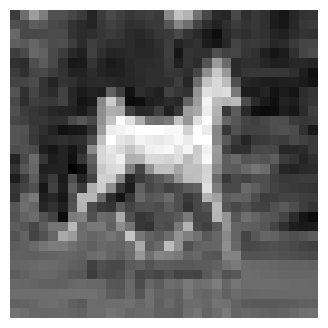

0


In [ ]:
import matplotlib.pyplot as plt




Xn = matrix1[:,:-2]
r=2
test= Xn[r+1,:]

image = test.reshape(32,32)
plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()
print(matrix[r, 1024])

In [ ]:
drive.mount('/content/drive')
file_path='/content/drive/My Drive/datasets/nn_test.csv'
data=pd.read_csv(file_path)
matrix_test = data.iloc[:, 1:].values


preds = predict(matrix_test.T, trained_parameters)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
